Situación Problema

Rodrigo Goff Peniche A00828816

Visualización de datos para la toma de decisiones



Madden Player Ratings

In [1]:


##pip install seaborn

In [2]:
##pip install statsmodels

In [3]:
##pip install sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib.pyplot import figure

In [5]:
df = pd.read_csv('madden21_ratings.csv')

Introduction

This dataset contains madden 21 ratings of each player based on its overall ratings and all the other attributes that improves in overall for each player. Each variable has its realtion and it depends on which position the player plays.

Dataset description

- Overall Rating: It is calculated by weighing certain attributes more heavily depending on the position of the player. 
- Age: It is the age of each player.
- Speed:  Determines how fast a player will seem on screen.
- Acceleration: Rate at which player will reach their fastest speed.
- Agility: Determines how quick a player can “cut” or change directions.
- Strenght: Higher the strength, the better a player will block or a defender will shed blocks and more effectively use power moves.
- Tackle: How often a player will get a good tackle animation and also makes it less likely to brake his tackle
- Stamina: Determines how fast a player will get tired and need to be subbed out. The higher the stamina, the longer a player can stay in the game without getting tired.
- Jumping: Determines how high a player can jump and catch a ball.
- Awareness: How quickly a player will react to his surroundings. With higher awareness ratings, blockers will set-up and react to blocking lanes better, wide receivers will look for the ball faster on routes, defenders will react to the ball faster in the air for zone and man coverage, while defensive lineman will react to run plays and slip screens faster.
- Height: It determines the height of the player.
- Weight: It determines the weight of the player.


1. Is there any relation between agility and speed?

We want to know if the players that have higher agility tend to have more speed 

Text(0.5, 1.0, 'Agility vs Speed')

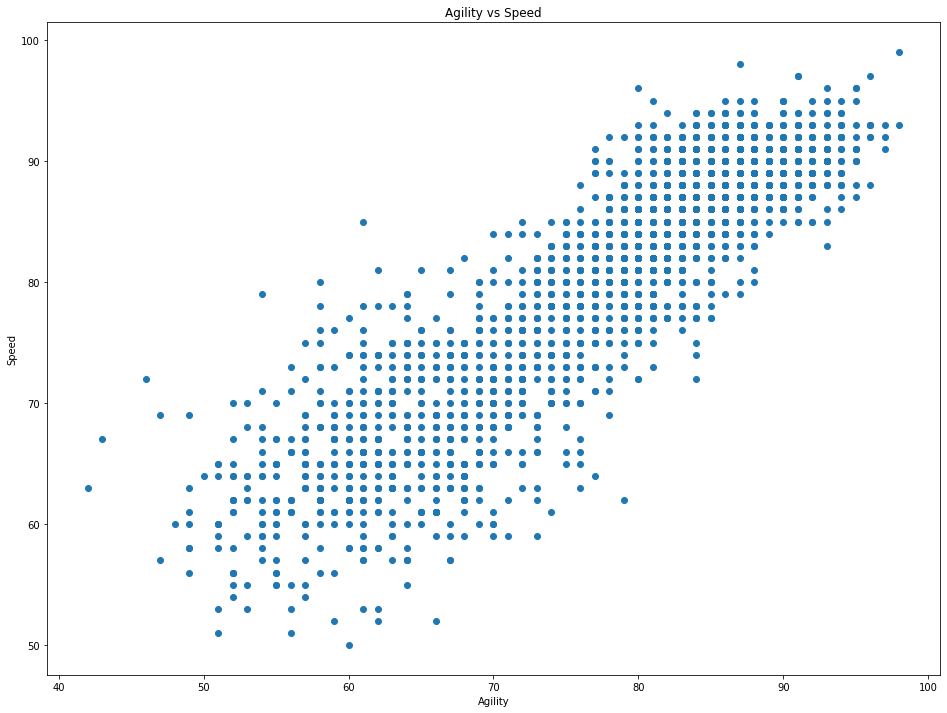

In [6]:
plt.figure(figsize=(16,12))
plt.scatter(df['Agility'], df['Speed'])
plt.xlabel('Agility')
plt.ylabel('Speed')
plt.title('Agility vs Speed')

In [7]:
df['Agility'].describe()

count    2293.000000
mean       77.398168
std        10.914979
min        42.000000
25%        69.000000
50%        80.000000
75%        86.000000
max        98.000000
Name: Agility, dtype: float64

In [8]:
df['Speed'].describe()

count    2293.000000
mean       79.833842
std        10.198032
min        50.000000
25%        72.000000
50%        83.000000
75%        88.000000
max        99.000000
Name: Speed, dtype: float64

Conclusion

We can see that there is a strong positive correlation and that the standard deviation is really close between Agility and Speed, so we can conclude that it does exists relation between this two atributes.

 2. How the distribution of Strenght looks amongst madden players and is it positevely or negatively skewed?
 
 We want to know if because there is only one league the percentage will be in the top half or will it be normaly distributed.

(array([  2.,  14.,  49.,  91., 290., 447., 496., 504., 344.,  56.]),
 array([25. , 32.4, 39.8, 47.2, 54.6, 62. , 69.4, 76.8, 84.2, 91.6, 99. ]),
 <a list of 10 Patch objects>)

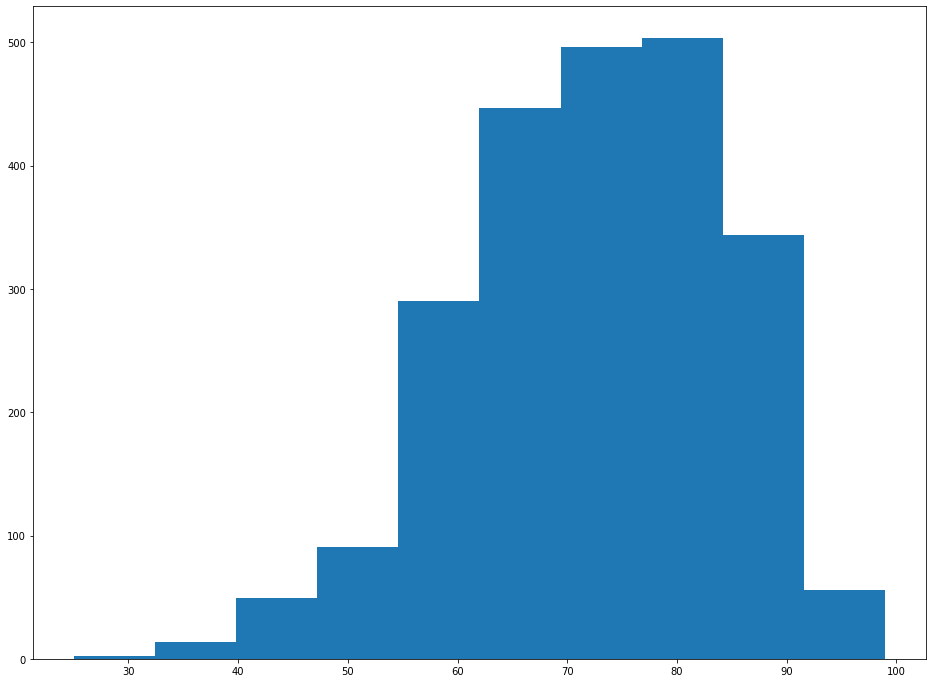

In [9]:
plt.figure(figsize=(16,12))
plt.hist(df['Strength'])

Conclusion

This data is negatively skewed because there is only one league and that tend the values to go higher.

3. What is the concentration of data in the Catching variable and is there any outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f28e7149450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28e7149ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f28e7142e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f28e71539d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f28e7153f10>],
 'means': []}

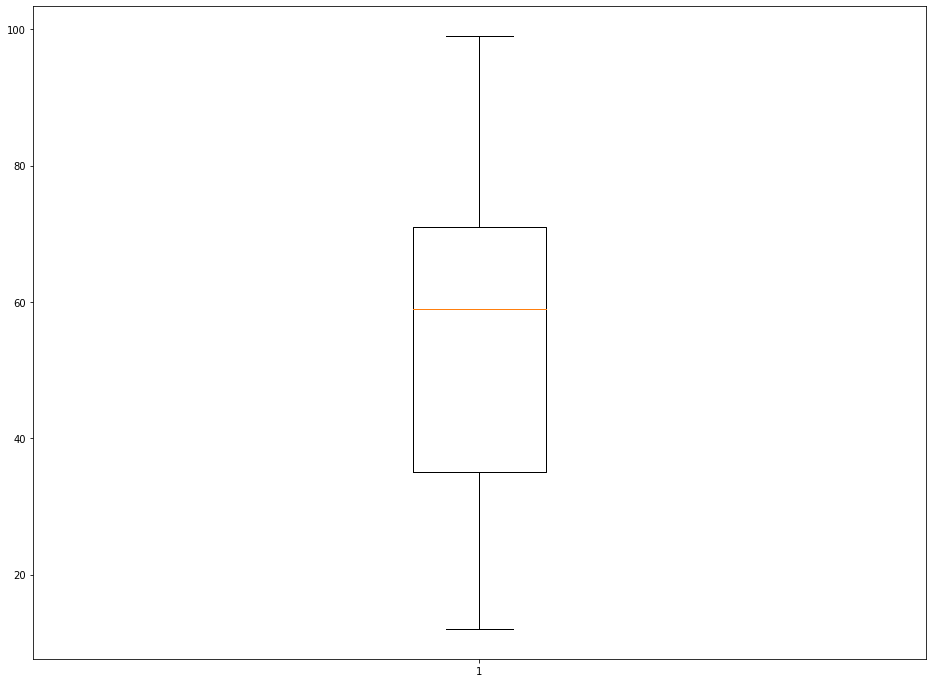

In [10]:
plt.figure(figsize=(16,12))
plt.boxplot(df['Catching'])

Conclusion

As we can see this box plot does not contain outliers in this variable , so we can conclude that this data is standarized.

4. What is the frequency of each unique value of the variable Overall Rating?

In [11]:
for i in df['Overall Rating'].index:
  var = df['Overall Rating'][i]

  if var > 90:
    df['Overall Rating'][i] = '90<'
  elif var >= 70 and var <= 90:
    df['Overall Rating'][i] = '70 - 90'
  else:
    df['Overall Rating'][i] = '<70'

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/srv/

Text(0.5, 1.0, 'Overall Rating pie chart')

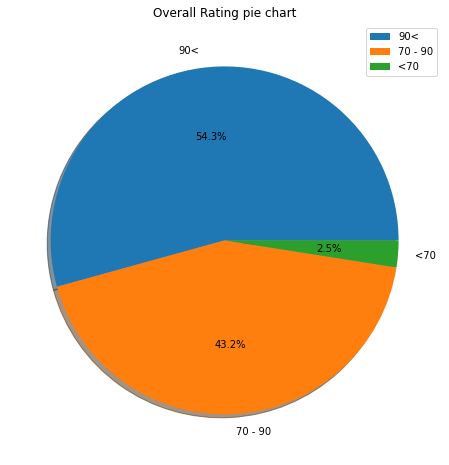

In [12]:
plt.figure(figsize=(12,8))
plt.pie(df['Overall Rating'].value_counts(), labels = list(df['Overall Rating'].unique()), autopct = '%1.1f%%', shadow = True )
plt.legend()
plt.title('Overall Rating pie chart')

Conclusion

We can see that from 91-98 rating have a frequency of 4% or more, from 87-90 have a frequency of 3% or more, from 79-86 have a frequency of 2% or more of the Overall Rating, and everything else has a frequency of 1% or more. 

5. What is the concentration of height and jumping and does the Height helps to jump higher?

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/cate

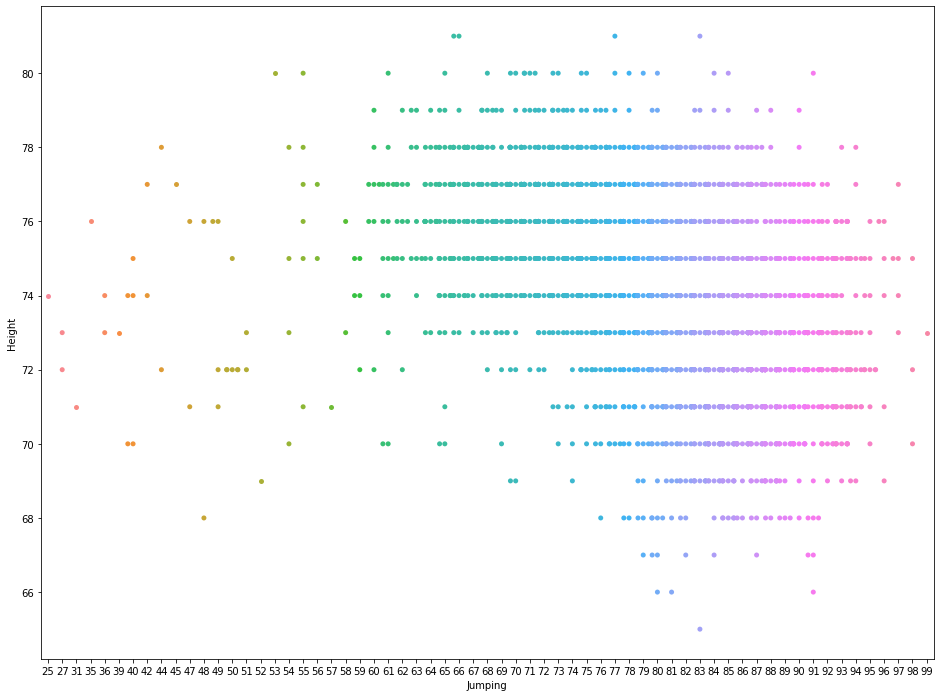

In [13]:
plt.figure(figsize =(16,12))
sns.swarmplot(x = 'Jumping',
              y= 'Height',
              data = df)

Conclusion

There is no reason to think that there is a relation between jumping and a person's height, so it doesn´t mean that if a player is taller it will jump more than the rest.

6. Is there any relation between Awarness and Stamina?

Text(0.5, 1.0, 'Awareness vs Stamina')

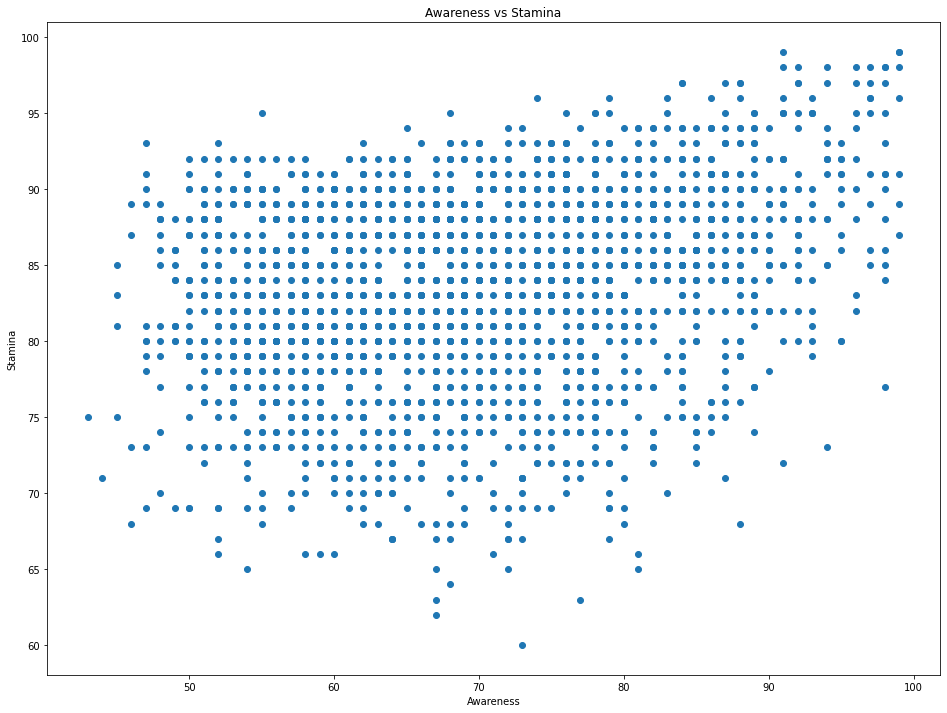

In [14]:
plt.figure(figsize=(16,12))
plt.scatter(df['Awareness'], df['Stamina'])
plt.xlabel('Awareness')
plt.ylabel('Stamina')
plt.title('Awareness vs Stamina')

Conclusion

As we can see there is no relation between this two variables, so if a player is aware it doesn't improve their stamina.